# Option 1: Virus Propagation on Static Networks

In [1]:
# Required imports
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter
from operator import itemgetter
import random
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
rcParams['figure.figsize'] = 8,5
rcParams['font.size'] = 10

In [2]:
# Reading in network input data
filename = "/static.network"
with open(filename, 'rb') as f:
    d = next(f, '')   # skip a line
    graph = nx.read_edgelist(f, nodetype=int)
    print("Size of Graph : %r " % (d.strip().decode("utf-8") ))
l = len(graph)

Size of Graph : '5715 10932' 


In [3]:
# Calculaing Max Eigenvalue
def max_eigen(g):
    try:
        L = nx.normalized_laplacian_matrix(g)
    except nx.NetworkXError:
        L = nx.normalized_laplacian_matrix(graph)
    # e = np.linalg.eigvals(L.A)
    e,_ = sp.sparse.linalg.eigs(L.A, k=1, which='LR')
    return e[0]

lambda_1 = max_eigen(graph)
print("Largest eigenvalue:", lambda_1)
# max(nx.laplacian_spectrum(graph))

Largest eigenvalue: (2+0j)


In [4]:
# Calculating Effective Strength of Virus
def eff_strength(g, beta, delta, lambda_1 = None):
    if not lambda_1:
        lambda_1 = max_eigen(g)
    c_vpm = float(beta/delta)
    s = lambda_1 * c_vpm            # Strength of virus
    return s.real

In [5]:
# graph.remove_nodes_from(np.random.choice(graph.nodes(), 200, replace = False))
# print(graph.size())
# print(max_eigen(graph))

In [6]:
# Setting up input values
beta1, beta2 = 0.20, 0.01       # Transmission Probability
delta1, delta2 = 0.70, 0.60     # Healing Probability
k1 = 200                        # No of vaccines

## Part 1

### Effective Virus Strength for Beta1 and Delta1 Values

In [7]:
print("Beta = %r, Delta = %r" % (beta1, delta1))
print("Effective Strength: ", eff_strength(graph, beta1, delta1, lambda_1))

Beta = 0.2, Delta = 0.7
Effective Strength:  0.571428571429


**1 (a) Will the infection spread across the network (i.e., result on an epidemic), or will it die quickly?**

Ans:
As s < 1, the network is stable.
The infection will die quickly.

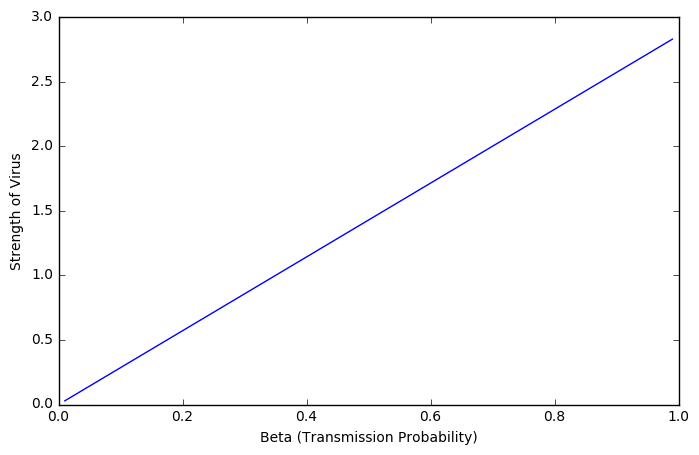

In [8]:
# Keeping δ fixed, analyze how the value of β affects the effective strength of the virus
strength = [eff_strength(graph, beta, delta1, lambda_1) for beta in np.arange(0.01,1,0.01)]

# print(strength)

# plt.figure(figsize = (15,10))
plt.plot(np.arange(0.01,1,0.01), strength)
plt.xlabel("Beta (Transmission Probability)")
plt.ylabel("Strength of Virus")
plt.show()

In [41]:
# Beta value where S becomes > 1
d = next(x[0] for x in enumerate(strength) if x[1] > 1)
min_beta = 0.01 * d
print(min_beta)

0

** 1 (b) What is the minimum transmission probability (β) that results in a network-wide epidemic? **

Ans:
As seen in the plot above, the relation between *beta* and *strength of virus* is linear.
Strength of virus goes above 1 at beta value = 0.35.

Therefore, the minimum transmission probability that results in a network-wide epidemic is 0.3. (For Delta = 0.7)

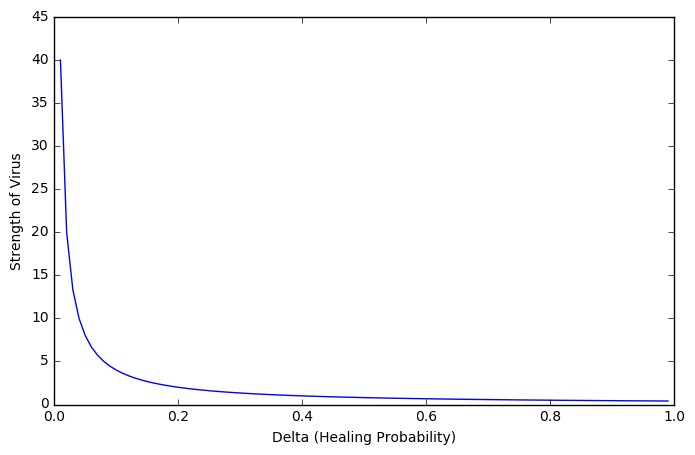

In [10]:
# Keeping β fixed, analyze how the value of δ affects the effective strength of the virus
strength = [eff_strength(graph, beta1, delta, lambda_1) for delta in np.arange(0.01,1,0.01)]

# print(strength)

# plt.figure(figsize = (15,10))
plt.plot(np.arange(0.01,1,0.01), strength)
plt.xlabel("Delta (Healing Probability)")
plt.ylabel("Strength of Virus")
plt.show()

In [11]:
d = next(x[0] for x in enumerate(strength) if x[1] < 1)
max_delta = 0.01 * d
print(max_delta)

0.4


** 1 (c) What is the maximum healing probability (δ) that results in a network-wide epidemic? **

Ans:
As seen in the plot above, the relationship between Delta and Strength is reverse exponential.
The strength of virus falls below 1 at delta = 0.41.

Hence, the maximum healing probability that can result in a network-wide epidemic is 0.41. (For Beta = 0.2)

### Effective Virus Strength for Beta2 and Delta2 Values

In [12]:
print("Beta = %r, Delta = %r" % (beta2, delta2))
s = eff_strength(graph, beta2, delta2, lambda_1)            # Strength of virus
print("Effective Strength: ", s)

Beta = 0.01, Delta = 0.6
Effective Strength:  0.0333333333333


**1 (a) Will the infection spread across the network (i.e., result on an epidemic), or will it die quickly?**

Ans:
As s < 1, the network is stable.
The infection will die quickly.

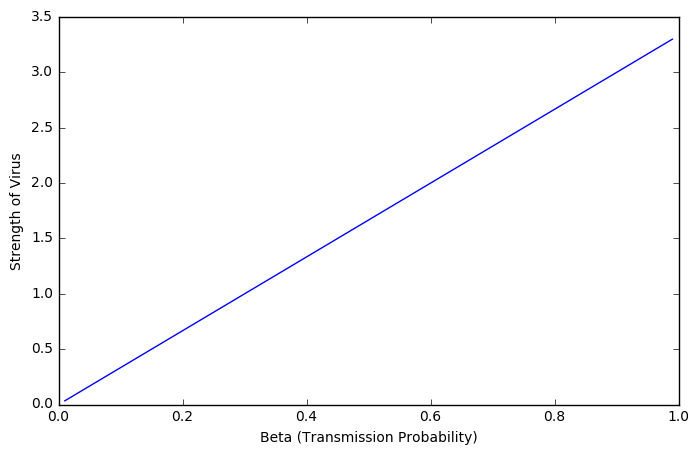

In [13]:
# Keeping δ fixed, analyze how the value of β affects the effective strength of the virus
strength = [eff_strength(graph, beta, delta2, lambda_1) for beta in np.arange(0.01,1,0.01)]

# print(strength)

# plt.figure(figsize = (15,10))
plt.plot(np.arange(0.01,1,0.01), strength)
plt.xlabel("Beta (Transmission Probability)")
plt.ylabel("Strength of Virus")
plt.show()

In [14]:
d = next(x[0] for x in enumerate(strength) if x[1] > 1)
min_beta = 0.01 * d
print(min_beta)

29

** 1 (b) What is the minimum transmission probability (β) that results in a network-wide epidemic? **

Ans:
As seen in the plot above, the relation between *beta* and *strength of virus* is linear.
Strength of virus goes above 1 at beta value = 0.35.

Therefore, the minimum transmission probability that results in a network-wide epidemic is 0.3. (For Delta = 0.6)

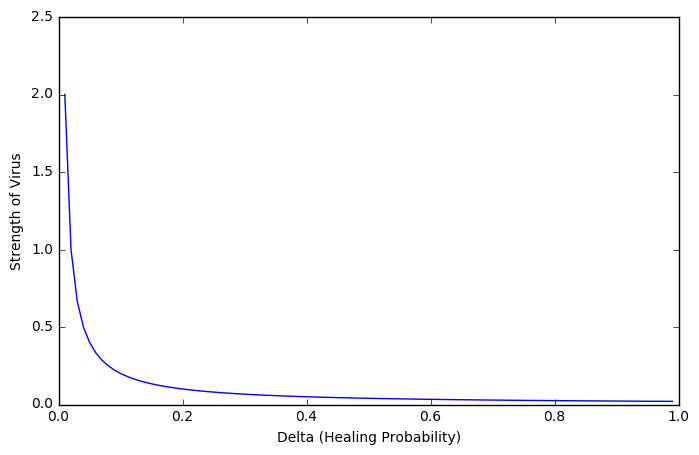

In [15]:
# Keeping β fixed, analyze how the value of δ affects the effective strength of the virus
strength = [eff_strength(graph, beta2, delta, lambda_1) for delta in np.arange(0.01,1,0.01)]

# print(strength)

# plt.figure(figsize = (15,10))
plt.plot(np.arange(0.01,1,0.01), strength)
plt.xlabel("Delta (Healing Probability)")
plt.ylabel("Strength of Virus")
plt.show()

In [16]:
d = next(x[0] for x in enumerate(strength) if x[1] < 1)
max_delta = 0.01 * d
print(max_delta)

0.02


** 1 (c) What is the maximum healing probability (δ) that results in a network-wide epidemic? **

Ans:
As seen in the plot above, the relationship between Delta and Strength is reverse exponential.
The strength of virus falls below 1 at delta = 0.41.

Hence, the maximum healing probability that can result in a network-wide epidemic is 0.03. (For Beta = 0.01)

We can see that the max delta has dropped very low in this case, because the corresponding beta (transmission probability) is very low.

## Part 2

In [17]:
'''
This is a Susceptible-Infected-Susceptible Propagation Simulation Model (SIS VPM) for Static Networks

At each time step, 
every susceptible (i.e., non-infected) node has a β probability of being infected by neighboring infected nodes, 
and every infected node has a δ probability of healing and becoming susceptible again.

g - Graph
beta - Transmission Probability
delta - Healing Probability
p_infected - Percent of nodes infected at start
time - number of time steps to simulate

returns a list with fraction of infected nodes for each time step
'''

def propsim(graph, beta, delta, p_infected, time, return_strength = False):
    g = graph.copy()
    # Randomly infect p_infected% nodes at start
    infected = set(np.random.choice(g.nodes(), int(l*(p_infected/100)), replace = False)) 
    frac_infected = [len(infected)/l]
    
    for _ in range(time):
        infected_new = set()
        for i in infected: # Propagate infection with probability 'beta' to neighbors of currently infected nodes
            nbrs = g.neighbors(i)
            nbrs_infected = random.sample(nbrs, int(beta*len(nbrs)))
            for j in nbrs_infected:
                infected_new.add(j)

        # Cure previously infected nodes with probability delta
        cured_new = random.sample(infected, int(np.ceil(delta*len(infected))))

        for n in infected_new: # Add newly infected nodes to list
            infected.add(n)

        for n in cured_new: # Remove cured nodes from infected node list
            infected.remove(n)

        frac_infected.append(len(infected)/l) # Calculate and append fraction of infected nodes at time step 'i'
    if return_strength:
        return eff_strength(g, beta, delta)
    return frac_infected

In [18]:
iterations = 3
time = 100

Beta = 0.2, Delta = 0.7


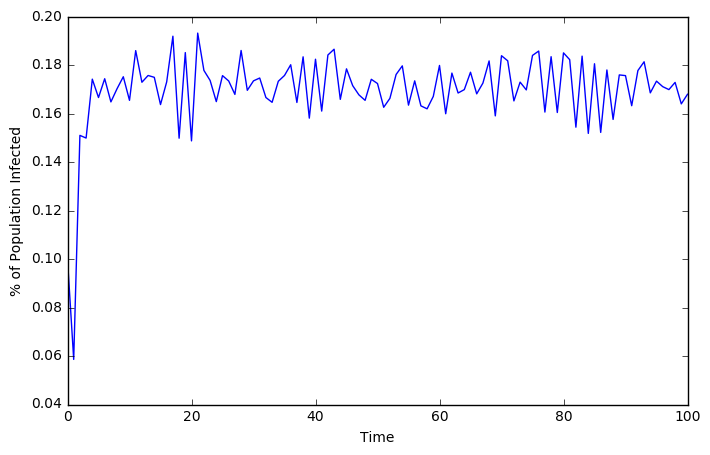

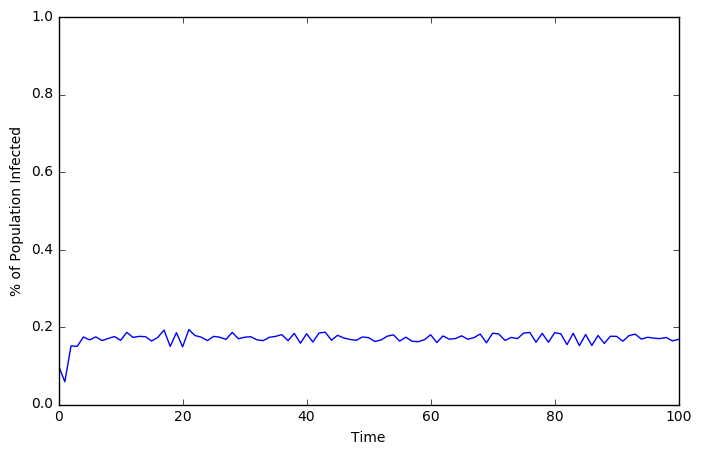

In [19]:
print("Beta = %r, Delta = %r" % (beta1, delta1))
frac_infected = np.array([propsim(graph, beta1, delta1, 10, time) for _ in range(iterations)])
avg_frac_infected = [np.mean(frac_infected[:,i]) for i in range(time+1)]
plt.plot(range(len(avg_frac_infected)), avg_frac_infected)
plt.xlabel("Time")
plt.ylabel("% of Population Infected")
plt.show()
plt.plot(range(len(avg_frac_infected)), avg_frac_infected)
plt.xlabel("Time")
plt.ylabel("% of Population Infected")
plt.ylim(ymin=0, ymax=1)
plt.show()

Beta = 0.01, Delta = 0.6


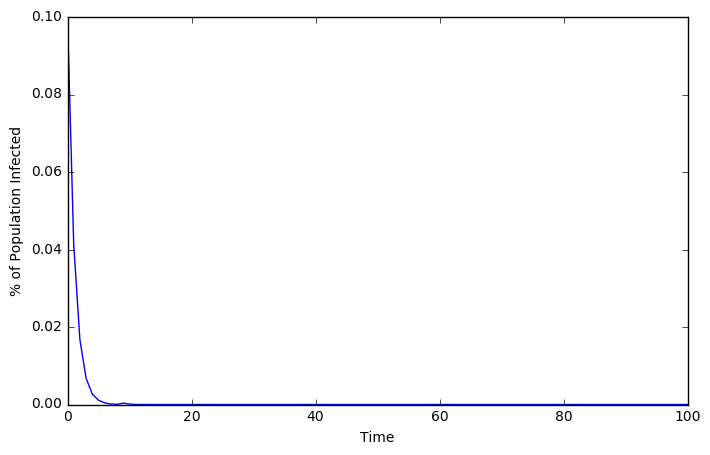

In [20]:
print("Beta = %r, Delta = %r" % (beta2, delta2))
frac_infected = np.array([propsim(graph, beta2, delta2, 10, time) for _ in range(iterations)])
avg_frac_infected = [np.mean(frac_infected[:,i]) for i in range(time+1)]
plt.plot(range(len(avg_frac_infected)), avg_frac_infected)
plt.xlabel("Time")
plt.ylabel("% of Population Infected")
plt.show()

For values of Beta = 0.2, Delta = 0.7, we see that the virus is stable.
It does not spread quickly throughout the network, as the value of Strength of virus S < 1.
It does not die quickly though (as thought of in Q-1(a)).

For values of Beta = 0.01, Delta = 0.6, as the probability of getting healed is way higher than probability of getting infected, we see the virus die out quickly.

## Part 3

In [21]:
'''
Immunization Policies
Given a number of available vaccines (k) and a contact network, 
the program should select k nodes to immunize. 
The immunized nodes (and their incident edges) are then removed from the contact network.

k = Number of vaccines available (ie number of nodes that can be immunized)

imm_policy - 
Policy A: Select k random nodes for immunization.
Policy B: Select the k nodes with highest degree for immunization.
Policy C: Select the node with the highest degree for immunization. 
          Remove this node (and its incident edges) from the contact network. Repeat until all vaccines are administered.
Policy D: Find the eigenvector corresponding to the largest eigenvalue of the contact network’s adjacency matrix.
          Find the k largest (absolute) values in the eigenvector. 
          Select the k nodes at the corresponding positions in the eigenvector.
'''

# Extending code in Part 2

def propsim_immun(graph, beta, delta, p_infected, time, imm_policy, k, simulate = True, return_strength = False):
    g = graph.copy()
    if imm_policy == 'A':
        nodes_immunized = np.random.choice(g.nodes(), k, replace = False)
        g.remove_nodes_from(nodes_immunized)
    elif imm_policy == 'B':
        by_degree = sorted(g.degree_iter(),key=itemgetter(1),reverse=True)[:k]
        nodes_immunized = [node[0] for node in by_degree]
        g.remove_nodes_from(nodes_immunized)
    elif imm_policy == 'C':
        for _ in range(k):
            by_degree = sorted(g.degree_iter(),key=itemgetter(1),reverse=True)[0]
            nodes_immunized = by_degree[0]
            g.remove_node(nodes_immunized)
    elif imm_policy == 'D':
        L = nx.normalized_laplacian_matrix(g)
        eigenvalue, eigenvector = sp.sparse.linalg.eigs(L.A, k=1, which='LR') # Source: https://networkx.github.io/documentation/development/_modules/networkx/algorithms/centrality/eigenvector.html
        largest = eigenvector.flatten().real
        nodes_immunized = list(np.argsort(largest))[-k:]
        g.remove_nodes_from(nodes_immunized)
    
    if not simulate:
        return eff_strength(g, beta, delta)
    return propsim(g, beta, delta, p_infected, time, return_strength)

** 3 (a) What do you think would be the optimal immunization policy? What would be its time complexity? 
Would it be reasonable to implement this policy? Justify. **

Ans:

An optimal immunization policy would be one which causes biggest drop in the largest eigenvalue (lambda_1).
But the time complexity of such a method would be very high, as we have to compare all possible subsets of nodes that can be immunized and check the result of removing them. This is NP-Hard problem; hence, unreasonable to implement.

But, of the given policies, policy *D* seems to be the best.
Random choice or degree of a node are poor criterion to select the best node for immunization.

Theory shows that factoring in eigenvalues helps in forming the optimum immunization policy.

In [31]:
def run_q3(imm_method, vaccines = range(0,6000,1000)):
    print("Immunization Policy : %s" % imm_method)
    k1 = 200
    print("3(c)")
    s_k1 = propsim_immun(graph.copy(), beta1, delta1, 0, 0, imm_method, k1, simulate = False)
    print("Strength of Virus = ", s_k1)

    print("\n3(d)")
    strength = [propsim_immun(graph.copy(), beta1, delta1, 0, 0, imm_method, k, False) for k in vaccines]
    plt.plot(vaccines, strength)
    plt.title("Immunization Method %s" % imm_method)
    plt.xlabel("No of vaccines")
    plt.ylabel("Strength of Virus")
    plt.show()

    print("\n3(e)")
    iterations = 10
    time = 100
    p_infected = 10
    frac_infected = np.array([propsim_immun(graph.copy(), beta1, delta1, p_infected, time, imm_method, k1, 
                                            simulate = True, return_strength = False) for _ in range(iterations)])
    avg_frac_infected = [np.mean(frac_infected[:,i]) for i in range(time+1)]
    plt.plot(range(time+1), avg_frac_infected)
    plt.title("Immunization Method %s" % imm_method)
    plt.xlabel("Time")
    plt.ylabel("Fraction of Population Infected")
    plt.show()

### Policy A : k-random nodes

**Intuition**: If the criterion to assign priorities to nodes for immunization cannot be formed, randomness seems a simpler option. It might work in some cases, and can establish a baseline for treatments.

**Pseudo Code**:

```python
def immun_random(graph, k):
    nodes_to_be_immunized = random.select(graph.nodes, k)
    graph.remove_nodes(nodes_to_be_immunized)
```

**Does it work? (Effective Strength S of Virus)**

The method should not have been effective. But the strength of virus S is < 1, hence the epidemic will be contained.

**Effect of Varying k**

Requires a high number of vaccines k to be successful.

**Simulation**

Initial drop is very low, and after that the virus becomes stable. (i.e. Initial vaccination did not aid in containing the virus).

Immunization Policy : A
3(c)
Strength of Virus =  0.571428571429

3(d)


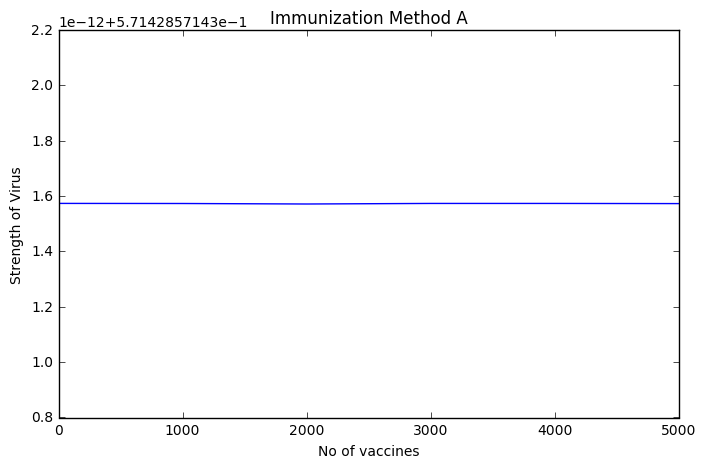


3(e)


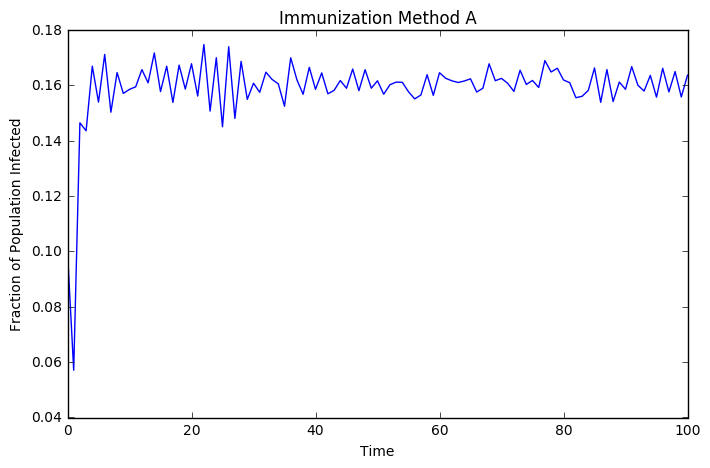

In [23]:
run_q3('A')

### Policy B : k-nodes with Highest Degree

**Intuition**: If we remove the nodes in graph who have most connections (who can infect more people just based on the fact that they can reach more people), that might help prevent the spread of the virus to some extent. Might not always work as a node with smaller degree can be the connection between two conencted components.

**Pseudo Code**:

```python
def immun_highest_degree(graph, k):
    nodes_to_be_immunized = sorted(graph.nodes() by degree)[-k:]
    graph.remove_nodes(nodes_to_be_immunized)
```

**Does it work? (Effective Strength S of Virus)**

The strength of the virus seems to be < 1.
Hence, the epidemic does not spread.

**Effect of Varying k**

The strength keeps dropping after a point.

**Simulation**

Consistent with results above in 3(d).

Immunization Policy : B
3(c)
Strength of Virus =  0.571428571429

3(d)


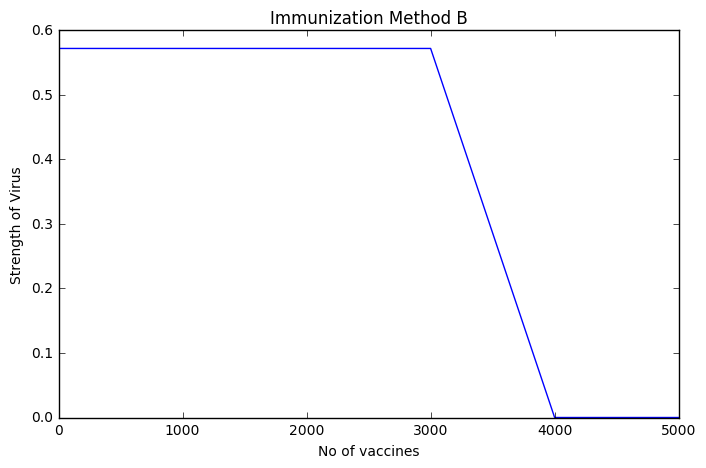


3(e)


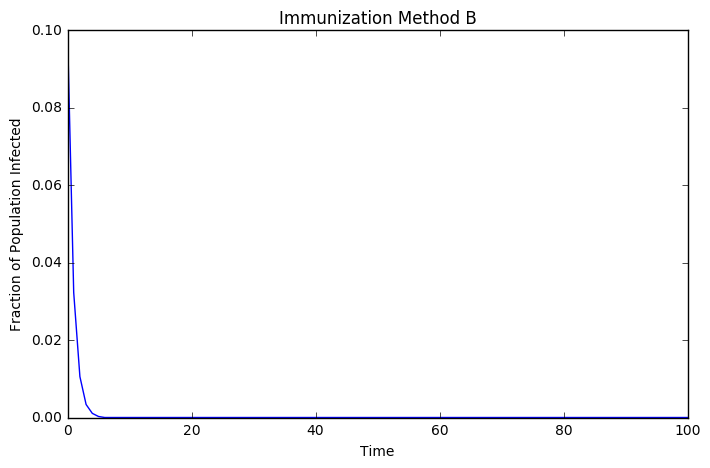

In [32]:
run_q3('B')

### Policy C : Recursively remove nodes with Highest Degree

**Intuition**: Similar to Policy B; but takes into consideration that nodes with highest degrees may be interconnected (a cluster).
Hence, one by one removes node with higest degree and corresponding edges, in hope that this will lead to better results than Policy B. (It should, althogh slightly).

**Pseudo Code**:

```python
def immun_one_highest_degree(graph, k):
    for 1 to k:
        node_to_be_immunized = sorted(graph.nodes() by degree)[-1:]
        graph.remove_node(node_to_be_immunized)
```

**Does it work? (Effective Strength S of Virus)**

It seems to work better than Policies A and B.

**Effect of Varying k**

The strength drops quickly as we increase k.

**Simulation**

Consistent with the results noticed above.

Immunization Policy : C
3(c)
Strength of Virus =  0.571428571429

3(d)


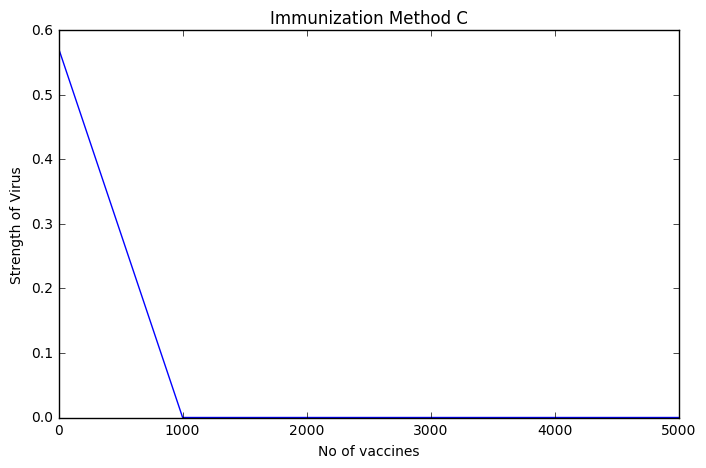


3(e)


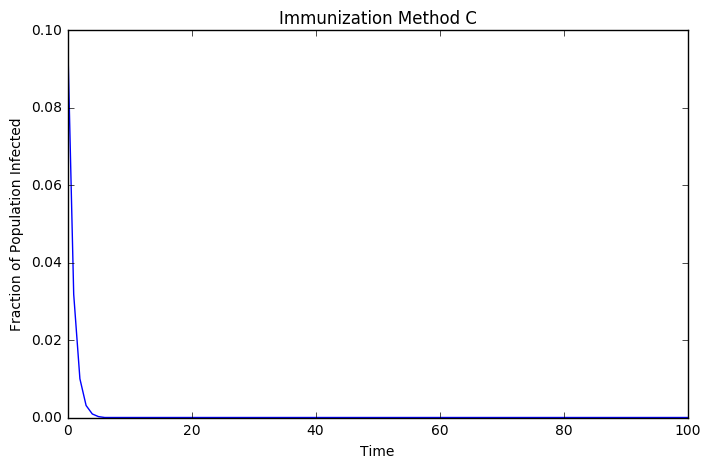

In [33]:
run_q3('C')

### Policy D : Remove k-nodes corresponding to k-largest eigenvalues in largest eigenvector

**Intuition**: 
As this policy considers the eigenvalues over degree or randomness, this should give the best results.
This should affect the largest eigenvalue, and in turn decreased strength of the virus.

**Pseudo Code**:

```python
def immun_largest_eigen(graph, k):
    max_eigenval, max_eigenvec = max_eigen(graph)
    nodes_to_be_immunized = graph.nodes(sorted(max_eigenvec)[-k:])
    graph.remove_nodes(nodes_to_be_immunized)
```

**Does it work? (Effective Strength S of Virus)**

The strength is > 1. Hence, the virus will spread through the network.

**Effect of Varying k**

Does not seem to work. The strength of the virus does not go below 1.

**Simulation**

Simulation shows ineffective vaccination.

Immunization Policy : D
3(c)
Strength of Virus =  0.571428571429

3(d)


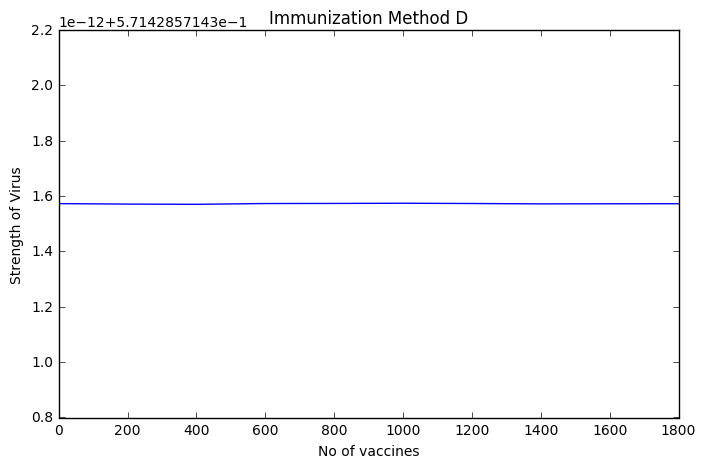


3(e)


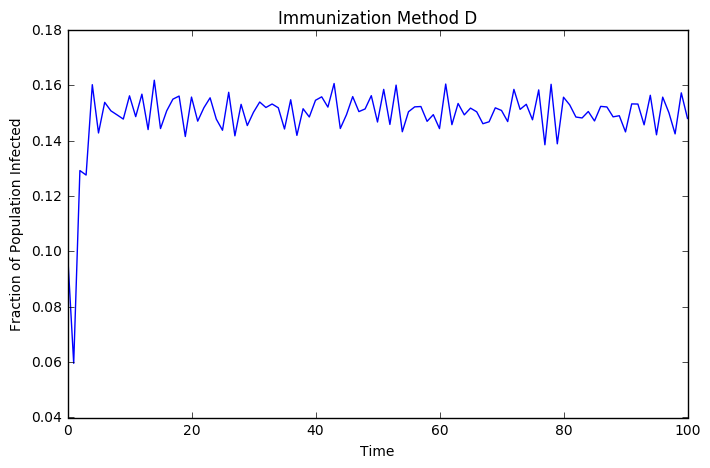

In [34]:
run_q3('D', range(0,2000,200))